Life Cycle process of machine learning-
1.Define libraries, Define the metrics for which the model is being optimized.

2.Data cleansing and wrangling.

3.Feature engineering(whether to drop  a particular column or not)

4.Data pre-processing

5.Feature selection

6.Split the data into training and test datasets.

7.Model selection (here we are taking linear regression)

8.Model validation

9.Interpret the results


In [41]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [4]:
boston            #we are getting a dictionary as output

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [11]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
bos.shape

(506, 13)

In [13]:
#adding a new column to the DataFrame with the target variables.
bos['target']=boston.target

In [14]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [15]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [16]:
bos.shape

(506, 14)

In [17]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [18]:
type(bos)

pandas.core.frame.DataFrame

In [19]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

<AxesSubplot:>

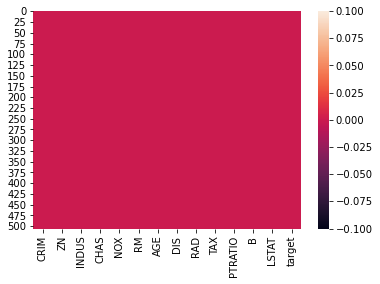

In [20]:
sns.heatmap(bos.isnull())

summary statistics

In [21]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


High satnadard deviations are present in ZN, INDUS, AGE,TAX variables means data is spread too much. Range is high.

crim,indus, Rad has mean greater than median, it means crim variable has right skewed data.

Large gap between 75 th percentile and max in CRIM, ZN,INDUS indiacates that outliers are present in these columns.

In [22]:
bos.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

<AxesSubplot:>

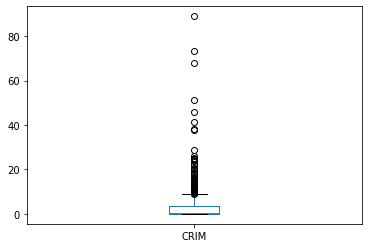

In [23]:
bos['CRIM'].plot.box()

<AxesSubplot:>

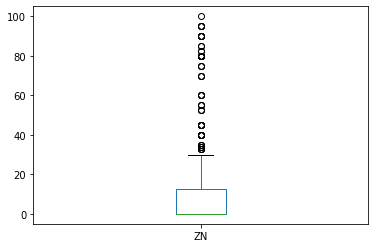

In [24]:
bos['ZN'].plot.box()

CRIM          AxesSubplot(0.125,0.536818;0.0945122x0.343182)
ZN         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
INDUS      AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
CHAS       AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
NOX        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
RM         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
AGE        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
DIS              AxesSubplot(0.125,0.125;0.0945122x0.343182)
RAD           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
TAX           AxesSubplot(0.351829,0.125;0.0945122x0.343182)
PTRATIO       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
B             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
LSTAT         AxesSubplot(0.692073,0.125;0.0945122x0.343182)
target        AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

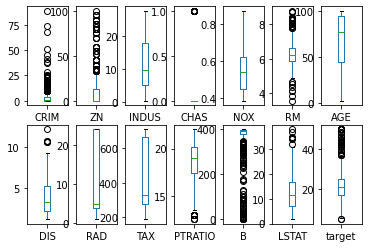

In [25]:
bos.plot(kind='box',subplots=True,layout=(2,7))

<AxesSubplot:>

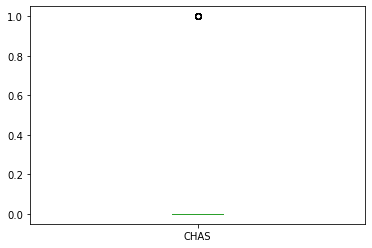

In [26]:
bos['CHAS'].plot.box()

In [27]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(bos))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

In [28]:
threshold=3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [29]:
z[55][1]

3.375038763517294

In [30]:
bos.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

<AxesSubplot:ylabel='Frequency'>

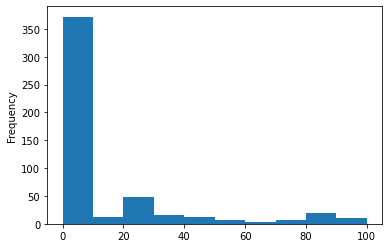

In [31]:
bos["ZN"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

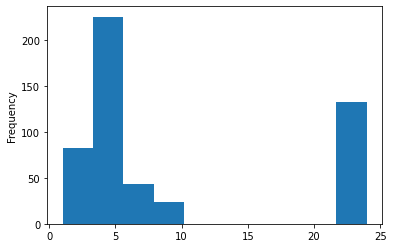

In [32]:
bos['RAD'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

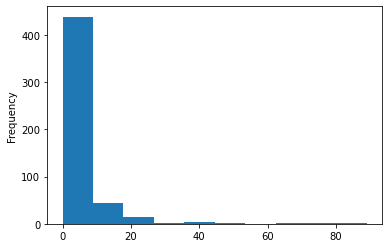

In [33]:
bos['CRIM'].plot.hist()

In [ ]:
#bos['CRIM']=np.log(bos['CRIM'])
#bos['CRIM'].plot.hist()

In [34]:
from scipy.stats import boxcox
#0 -> log transform
#.5-> square root transform
bos['CRIM']=boxcox(bos['CRIM'],0)    #for the purpose of removing skewness

<AxesSubplot:ylabel='Frequency'>

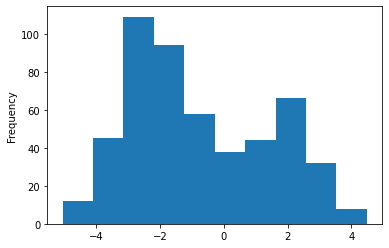

In [35]:
bos["CRIM"].plot.hist()

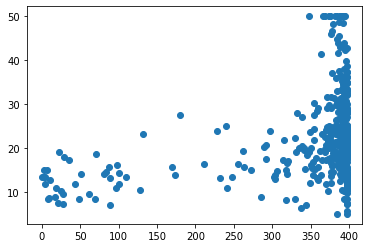

In [36]:
plt.scatter(bos['B'],bos['target'])
plt.show()

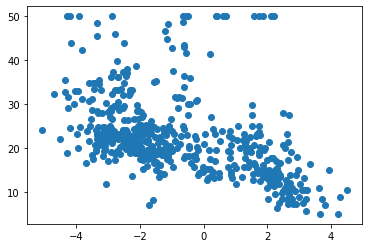

In [37]:
plt.scatter(bos['CRIM'],bos['target'])
plt.show()

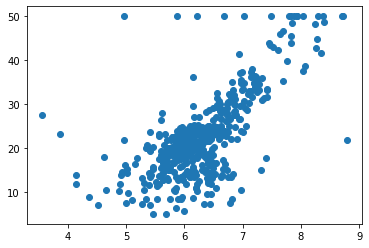

In [41]:
x=bos['RM']
y=bos['target']
plt.scatter(x,y)
plt.show()

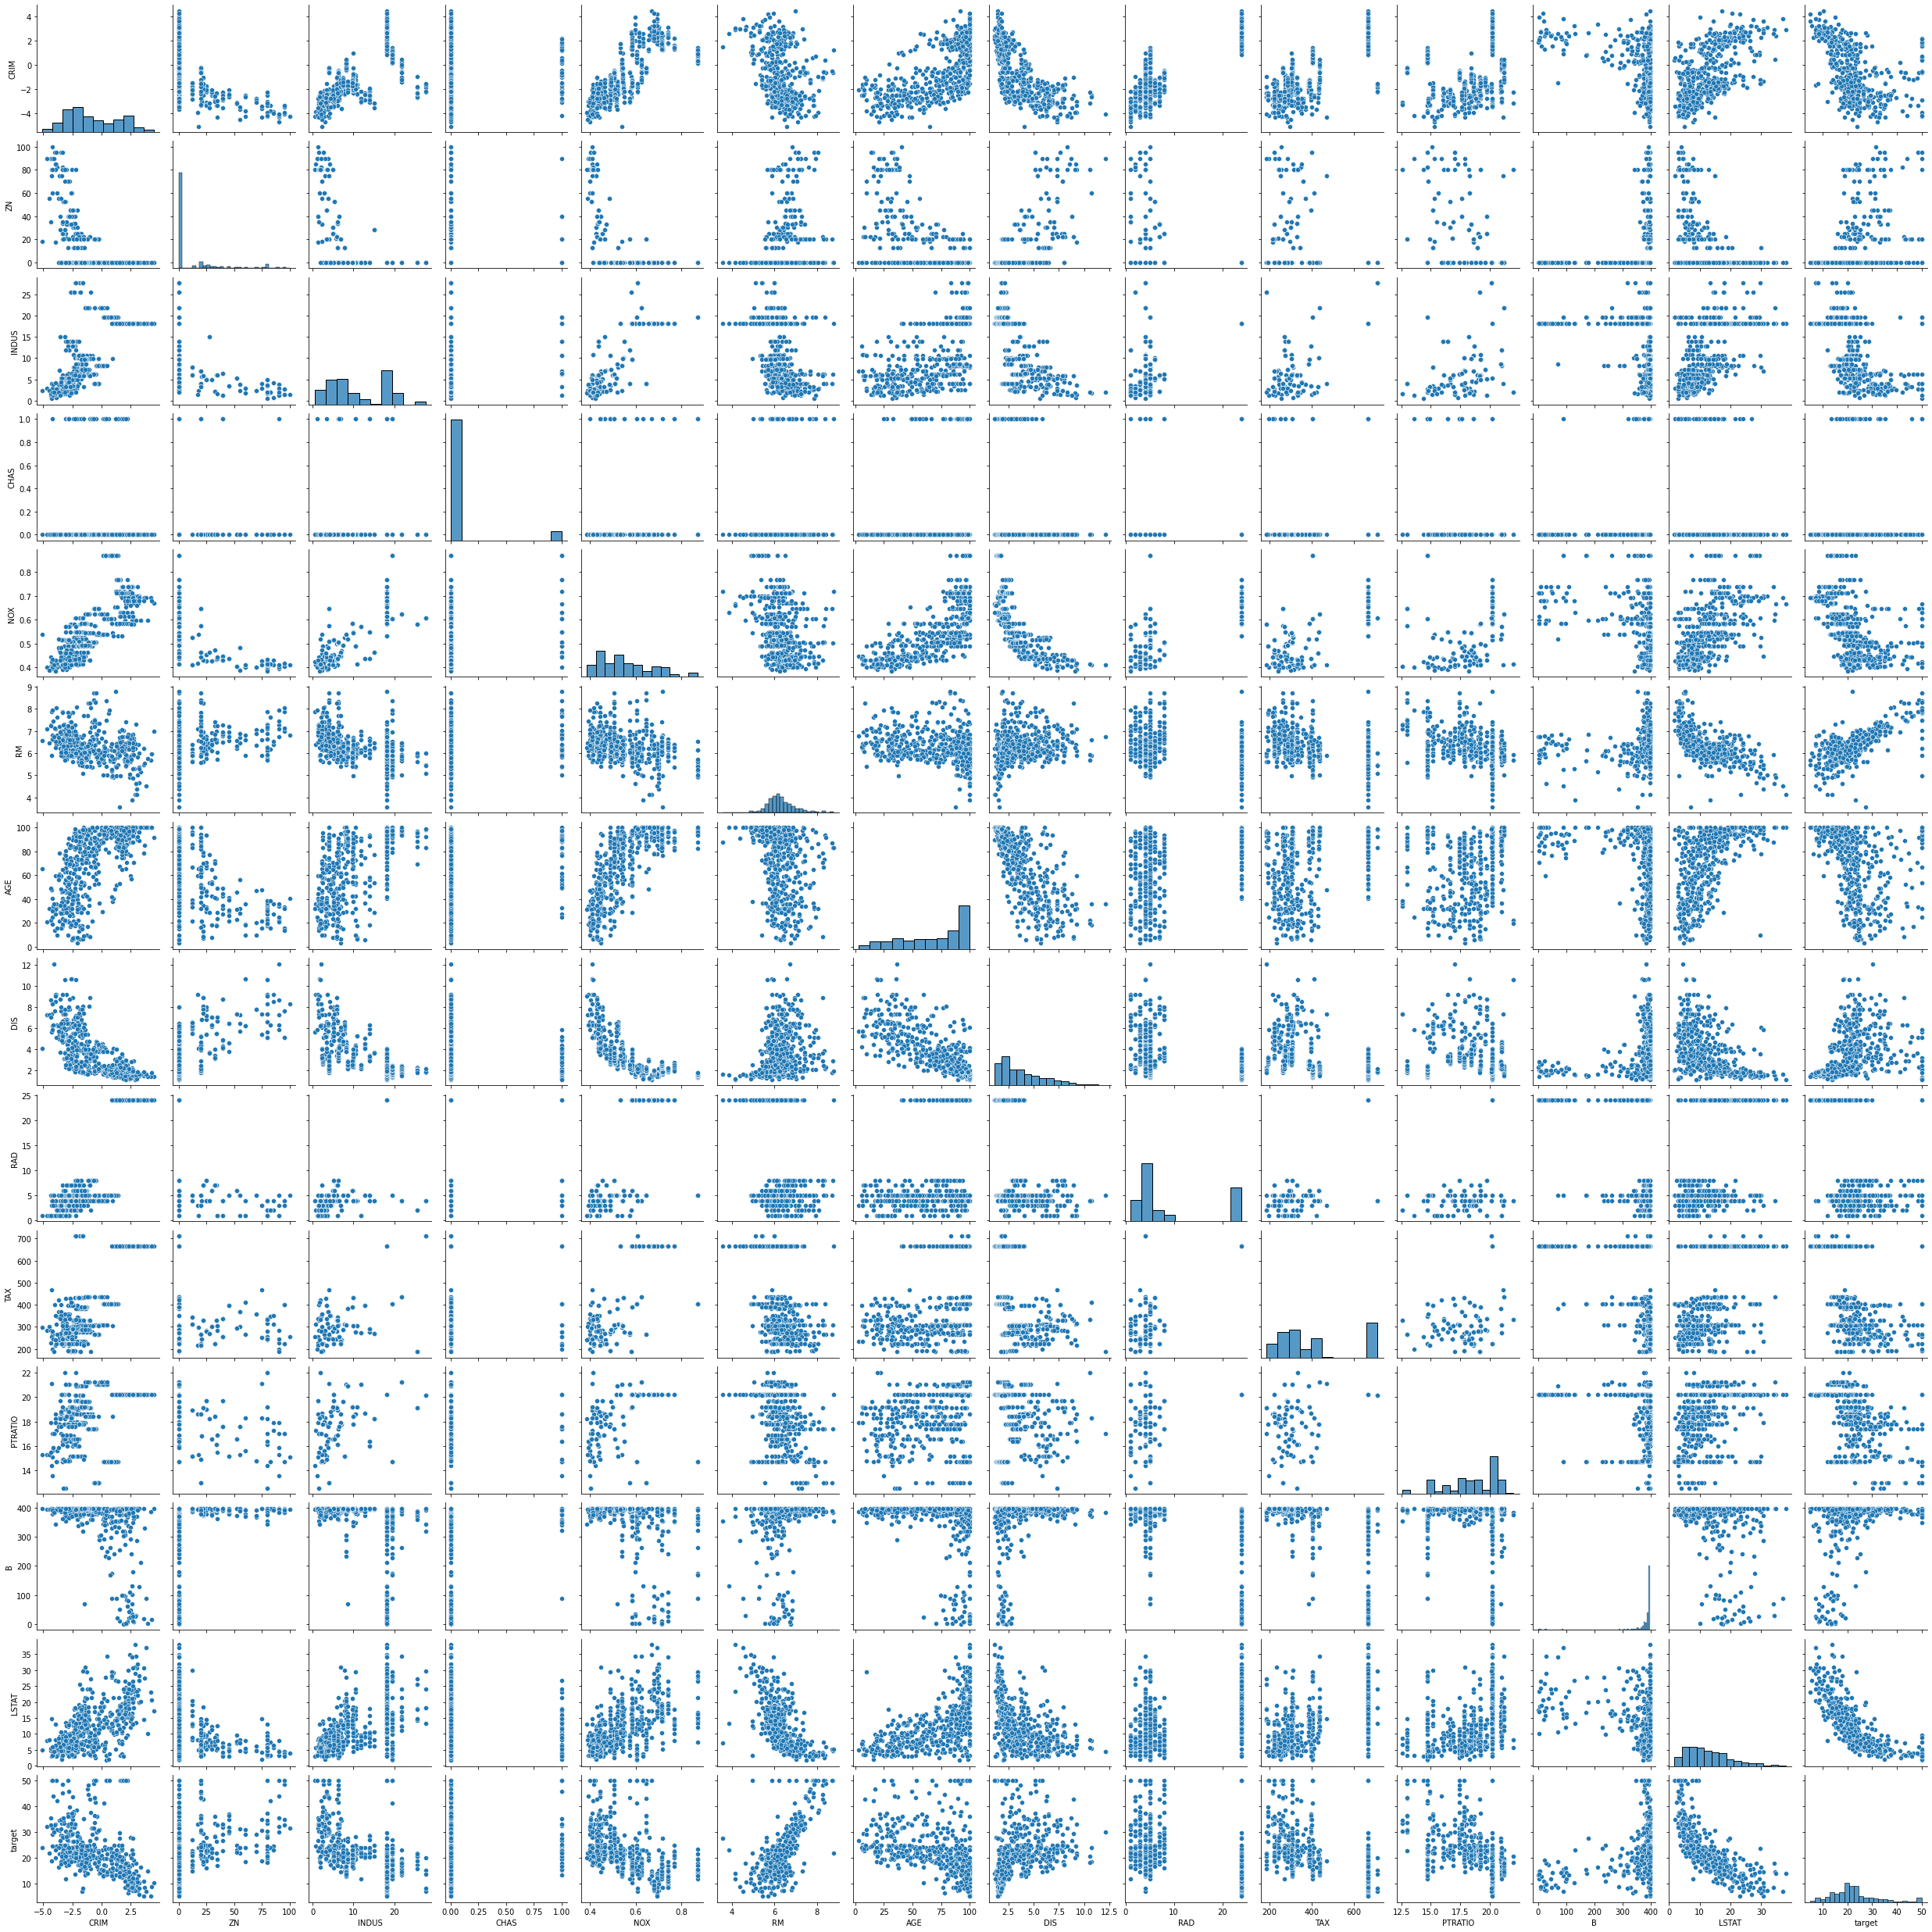

In [42]:
+

In [38]:
corr_heat=bos.corr()

In [39]:
corr_heat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.517091,0.730821,0.028496,0.788616,-0.306943,0.658284,-0.681903,0.853407,0.828234,0.389554,-0.478755,0.626615,-0.454302
ZN,-0.517091,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.730821,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.028496,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.788616,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.306943,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.658284,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.681903,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.853407,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.828234,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

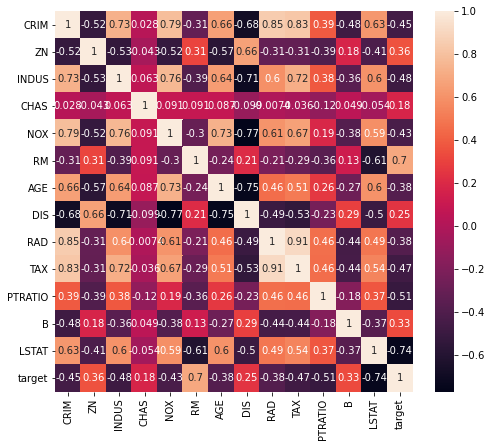

In [40]:
plt.figure(figsize=(8,7))
sns.heatmap(corr_heat,annot=True)

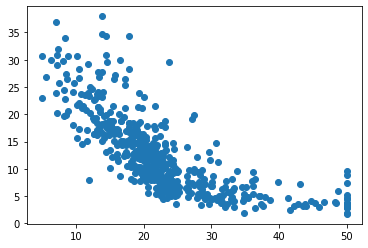

In [46]:
plt.scatter(bos['target'],bos['LSTAT'])
plt.show()

In [47]:
#drop the Lstat becuse it is effecting the house price very much negatively.
bos.drop('LSTAT',axis=1,inplace=True)

In [48]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2


In [49]:
bos_new=bos[(z<3).all(axis=1)]       #removing outliers

In [50]:
bos.shape

(506, 13)

In [52]:
bos_new.shape

(415, 13)

In [53]:
bos=bos_new

In [54]:
bos.shape

(415, 13)

In [57]:
x=bos.iloc[:,0:-1]   #excludes the target(target is having index '-1')
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [60]:
y=bos.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [61]:
x.shape

(415, 12)

In [62]:
y.shape

(415,)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [64]:
x_train.shape

(278, 12)

In [65]:
y_train.shape

(278,)

In [66]:
x_test.shape

(137, 12)

In [67]:
y_test.shape

(137,)

In [68]:
lm=LinearRegression() #here we are calling the LinearRegression() class and creating the instance/object 'lm' 

In [69]:
lm.fit(x_train,y_train)

LinearRegression()

In [74]:
lm.coef_ #Here we are getting the coefficients present in the equation

array([ 4.14796426e-01, -9.48452702e-03, -4.06227602e-02,  5.72909775e-14,
       -1.23983569e+01,  8.31144766e+00, -6.77907881e-02, -1.13441493e+00,
        5.01745969e-02, -1.14702471e-02, -7.86910388e-01,  9.22717357e-03])

In [75]:
lm.intercept_ #here we are getting the intercept present in the equation

1.8854666465849448

In [76]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'target'],
      dtype='object')

In [77]:
lm.score(x_train,y_train) #It is working well by 75%

0.7450145138939896

In [78]:
pred=lm.predict(x_test) #putting the test datas into the produced linear regression equation.
print('Predicted result price:',pred)
print("actual price:",y_test)

Predicted result price: [20.52442424 14.50954987 31.48981889 18.38422384 13.11595168 20.74166358
 17.31106356 25.10782451 29.63472112 10.80717631 17.72388147 15.66550921
  8.98488733 24.2796744  28.0476132  10.66047743 25.72749894 27.39232049
 24.82886327 14.00150342 21.74381609 19.10692104 23.56431589 12.02612149
 21.95599491 21.65951382 31.75447852 27.59747081 22.12417845 25.11716752
 32.44831628 14.71524841 13.54990408 26.20905344 15.60321561 15.05490348
 26.86359361 22.35845603 13.86144763 18.99549243 17.0945682  18.05130457
 20.53768755 26.7156161  17.09451963 26.13236614 19.94441974 19.53061132
 17.73605627 24.45928944 20.77561576 19.08973639 39.75458281 13.43911029
 19.02561668 22.10396188 18.67498499 41.20330795 20.14021397 18.15193296
 26.50489232 16.78844208 24.55486022 27.9783275  14.51500777  5.34938429
 34.18098705 19.63353383 19.10870329 22.45899667 35.32998138 19.93681787
 24.22017841 24.67056111 15.35382945 22.52605265 16.4249922  17.9233105
 22.49542546 16.40495667 17.

In [79]:
print("error:")


print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 2.828070501926145
Mean squared error: 25.677469856868516
Root Mean Squared Error: 5.067294135617995


In [80]:
#r2 score-> coefficient of determination(can also be called as r square)
#is the proportion of the variance in the dependent variable that is predictable from the independent variables.
#i.e change coming in y with change in x
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))    #55% changes coming in output whenever inputs are being changed.

0.5559219963471589


In [81]:
#providing fresh data and asking the machine to answer.
t=np.array([0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90])

In [82]:
t.shape

(12,)

In [83]:
t=t.reshape(1,-1)   # converting to 1 row, multiple columns format.
#t.reshape(-1,1) indicates converting to multiple rows, 1 column format.

In [84]:
t

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02]])

In [85]:
t.shape

(1, 12)

In [86]:
lm.predict(t)    #linear regression model takes 2D data(i.e in row and column format).So we are using reshape().

array([28.81878168])

In [88]:
#storing the predicted prices
df=pd.DataFrame(pred)
df.to_csv('house_pred_submission.csv')

# Concrete Dataset

In [42]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
ds=pd.read_csv('concrete_data.csv')

In [44]:
data=pd.DataFrame(data=ds)

In [45]:
data

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [46]:
data.shape

(1030, 9)

In [47]:
data.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

In [48]:
data.info()   #to check if any null data is present in the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [49]:
data.isnull().sum()  #To check if any null data is present in the dataframe

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [50]:
data.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

In [51]:
data.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<AxesSubplot:>

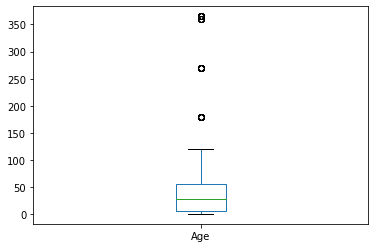

In [52]:
data['Age'].plot.box()

Cement                 AxesSubplot(0.125,0.536818;0.133621x0.343182)
Blast               AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Fly Ash              AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Water               AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Superplasticizer    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
CA                        AxesSubplot(0.125,0.125;0.133621x0.343182)
FA                     AxesSubplot(0.285345,0.125;0.133621x0.343182)
Age                     AxesSubplot(0.44569,0.125;0.133621x0.343182)
CMS                    AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

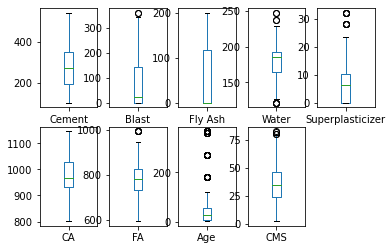

In [54]:
data.plot(kind='box',subplots=True,layout=(2,5))

<AxesSubplot:>

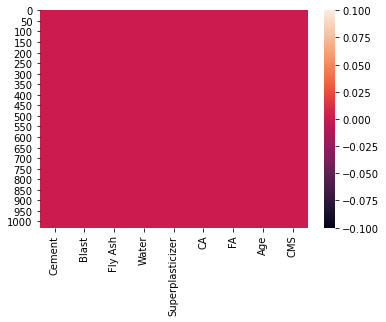

In [55]:
sns.heatmap(data.isnull())

In [57]:
datacor=data.corr()
datacor

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

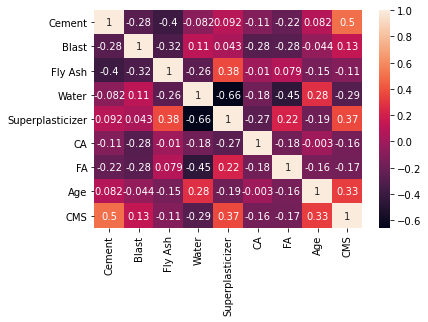

In [58]:
sns.heatmap(datacor,annot=True)

<AxesSubplot:ylabel='Frequency'>

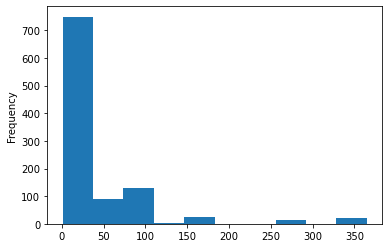

In [59]:
data['Age'].plot.hist()          #skewness is present here.

In [61]:
data['Age']=np.log(data['Age'])   #for lowering the skewness present

<AxesSubplot:ylabel='Frequency'>

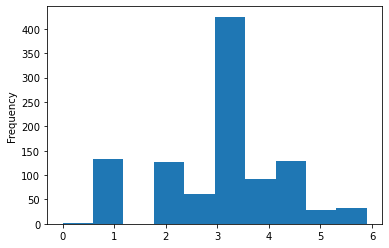

In [62]:
data['Age'].plot.hist()  #skewness reduced to some extent

Univariate analysis

<AxesSubplot:xlabel='Age', ylabel='Density'>

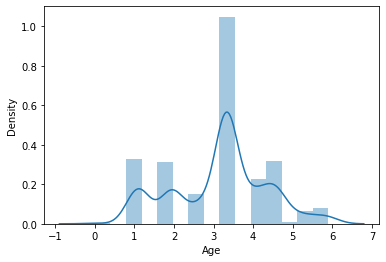

In [63]:
sns.distplot(data['Age'])

In [64]:
data.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

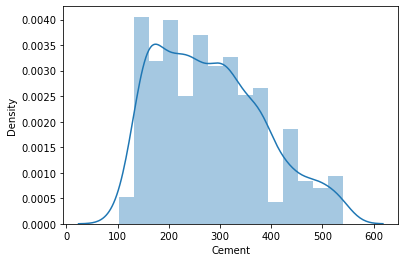

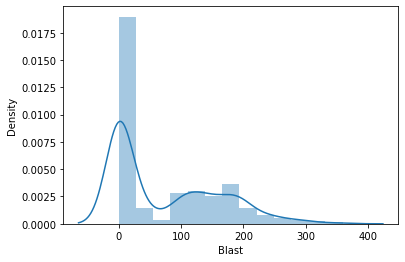

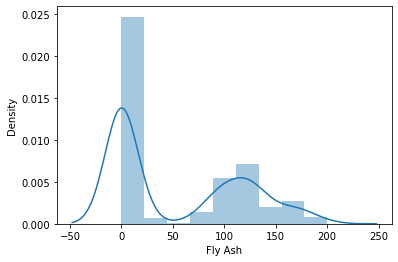

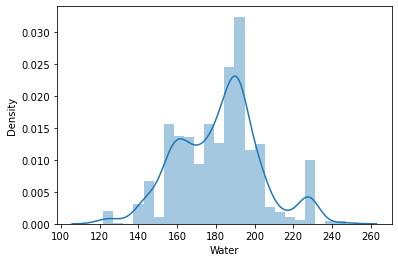

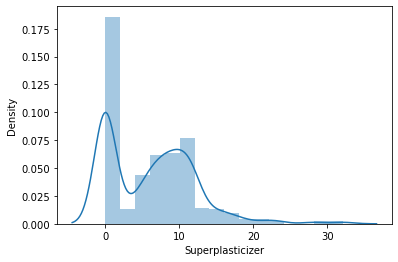

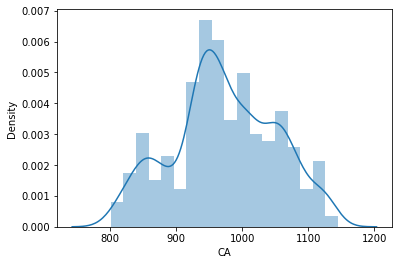

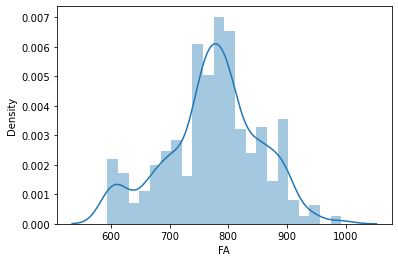

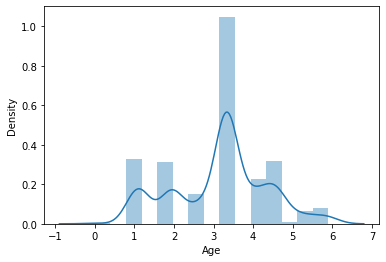

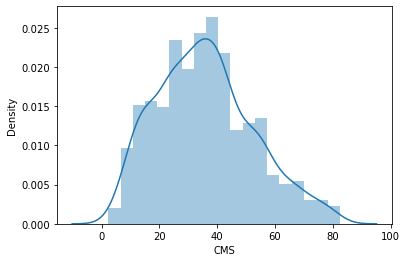

In [66]:
for i in data.columns:
    plt.figure()          #if we dont give this command,then only the last plot will be plotted.
    sns.distplot(data[i])

In [67]:
y=data.iloc[:,-1]

In [69]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: CMS, dtype: float64

In [70]:
y.shape

(1030,)

In [71]:
x=data.iloc[:,0:8]

In [72]:
x.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,3.332205
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,3.332205
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5.598422
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5.899897
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5.886104


In [73]:
x.shape

(1030, 8)

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [75]:
x_train.shape

(803, 8)

In [76]:
y_train.shape

(803,)

In [77]:
x_test.shape

(227, 8)

In [78]:
y_test.shape

(227,)

In [81]:
lm=LinearRegression() #creating object 'ln' from the 'linearRegression' class

In [83]:
lm.fit(x_train,y_train)

LinearRegression()

In [85]:
lm.score(x_train,y_train) # Regression in 81% successful

0.8155123615631037

In [87]:
lm.coef_   # finding the coefficients in the linear equation
#Note that number of elements in the array is equal to the number of columns

array([ 0.1327493 ,  0.11589363,  0.08930205, -0.1152292 ,  0.15129995,
        0.02998802,  0.03699063,  8.71214574])

In [88]:
lm.intercept_

-80.4428215259439

In [90]:
pred=lm.predict(x_test) # The test data is being inserted into the linear regression equation created.

In [91]:
print('Predicted value and actual value:',pred,y_test)

Predicted value and actual value: [45.94143103 45.59000943 65.05453834 38.20822699 18.61063008 41.95125461
 28.48118192 50.51889007 32.51634641 46.07321515 31.23228031 13.31884893
 50.60729564 45.3149854  28.40089773 38.63155258 31.84561192 20.59750655
 33.74635391 29.96984838 41.26710687 39.01176804 44.4265411  11.69449923
 31.01240222 36.70446097  9.71219923 43.17708004 46.85076984  9.34839437
 41.48125751 35.90086883 49.90239813 51.13233625 16.64107129 32.89082651
 32.36993845 40.64834791 14.07403367 44.41218346 16.77752079  2.72800172
 38.22054077 54.13252387  7.32465049 63.89230054 52.14916009 48.53753806
 24.71626651  5.83607665 43.79018741 43.0363338  30.5407319  27.65732794
 52.70641392 38.39412033 26.47754716 10.96299691 35.27900934 23.05539963
 40.49782775  7.82119948 37.87429393 48.4148116  26.59062026 22.3745696
 34.42189872 18.70824839 31.92557897 24.60173206  5.87176008 22.11685523
  0.98270563 31.17933432 30.32905573  7.34972174 46.5819465  49.79104578
 61.73952541 18.43

In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(pred,y_test))

46.862802661117996


lets make one test

In [93]:
def predicttest(testvalue):
    testvalue=testvalue.reshape(1,-1)        #Regression wants 2D data(rows and columns). This converts it into row,column format
    t=lm.predict(testvalue)
    return t

In [94]:
testv=np.array([540.0,136.158676,120.288793,162.0,2.5,1040.0,676.0,28.0])

In [95]:
predicttest(testv) #calling the function

array([299.60816786])